In [33]:
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad

In [26]:
# data input
csvname = 'student_debt.csv'
data = np.loadtxt(csvname,delimiter = ',')

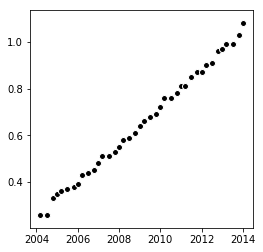

In [29]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [272]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w # weight we return, should be the one providing lowest evaluation
    whistory = []
    whistory.append(w)
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        whistory.append(w)
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return whistory

In [273]:
# form the input/output data vectors
x = data[:,0]
y = data[:,1]

# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair
        x_p = x[p]
        y_p = y[p]
        
        # form linear combination
        c_p = w[0] + w[1]*x_p
        
        # add least squares for this datapoint
        cost += (c_p - y_p)**2
        
    return cost

In [274]:
# try out least squares function
w = np.asarray([-150,0.078])
least_squares(w)

1468.4683651999997

In [315]:
# run gradient descent
w = np.asarray([1,1.5])
weight_history = gradient_descent(g = least_squares,alpha = 0.00000001,max_its = 5,w = w)

In [316]:
# MSE history plotter
def MSE(weight_history,g):
    # loop over weight history and compute the MSE at each step o gradient descent
    MSE_value = []
    for i in range(len(weight_history)):
        MSE_value.append(least_squares(weight_history[i]))       
    # plot cost function history
    print(MSE_value[-1])
    plt.plot(MSE_value)
    
    plt.show()

1101518965853.0986


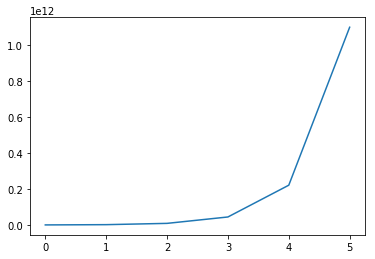

In [317]:
MSE(weight_history,g=least_squares)

In [300]:
weight_history[-1]

array([ 9.99253321e-01, -1.72156364e-04])

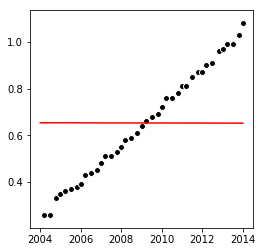

In [301]:

w = weight_history[-1]
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(2004,2014,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()